# Quick demo of segmentation

In [1]:
import numpy as np
import pandas as pd
import stumpy as sp
import os
import sys
import matplotlib.pyplot as plt

sys.path.insert(0, "../")
from pert.sampling import MatrixProfileSegmentation, SAXSegmentation


In [2]:

url = "https://zenodo.org/record/4273921/files/STUMPY_Basics_steamgen.csv?download=1"
df = pd.read_csv(url)
n = 256
ts = df["steam flow"][:n]
ts2 = df["drum pressure"][:n]
mts = np.stack([ts, ts2], axis=1)

## Segmentation with bins of matrix profile distance

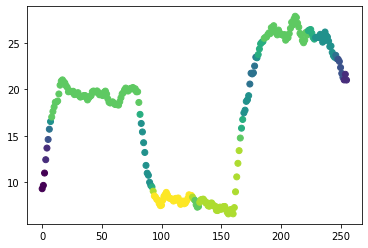

In [3]:
mseg = MatrixProfileSegmentation(partitions=10, win_length=32)
seg_m = mseg.segment(ts.values.reshape(-1, 1), segmentation_method="bins-max")
plt.scatter(range(n), ts, c=seg_m)

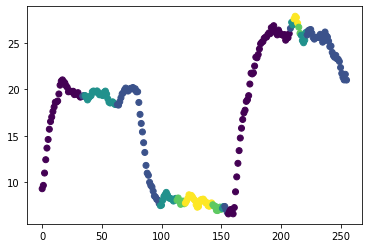

In [4]:
seg_m = mseg.segment(ts.values.reshape(-1, 1), segmentation_method="bins-min")
plt.scatter(range(n), ts, c=seg_m)

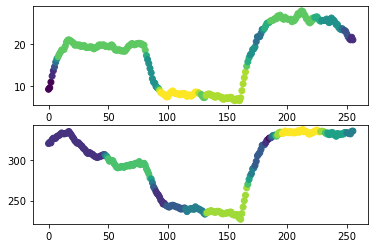

In [5]:
seg_m = mseg.segment(mts, segmentation_method="bins-max")
fig, ax = plt.subplots(2,1)
ax[0].scatter(range(n), mts[:, 0], c=seg_m[:,0])
ax[1].scatter(range(n), mts[:, 1], c=seg_m[:,1])
plt.show()

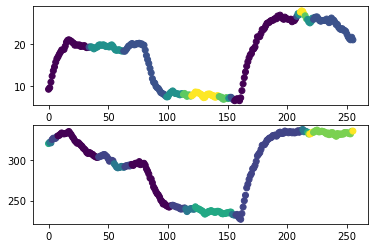

In [6]:
seg_m = mseg.segment(mts, segmentation_method="bins-min")
fig, ax = plt.subplots(2,1)
ax[0].scatter(range(n), mts[:, 0], c=seg_m[:,0])
ax[1].scatter(range(n), mts[:, 1], c=seg_m[:,1])
plt.show()

## Segmentation with slopes of matrix profile distance

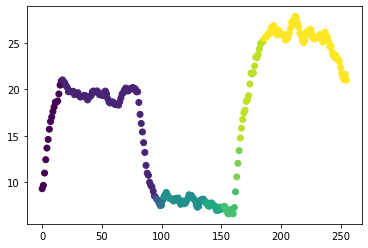

In [7]:
seg_m = mseg.segment(ts.values.reshape(-1, 1), segmentation_method="slopes")
plt.scatter(range(n), ts, c=seg_m)

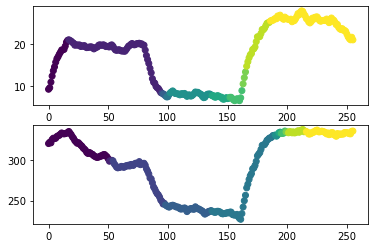

In [8]:
seg_m = mseg.segment(mts, segmentation_method="slopes")
fig, ax = plt.subplots(2,1)
ax[0].scatter(range(n), mts[:, 0], c=seg_m[:,0])
ax[1].scatter(range(n), mts[:, 1], c=seg_m[:,1])
plt.show()

## Segmentation with SAX

/usr/local/Caskroom/miniconda/base/envs/dev37/lib/python3.7/site-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/usr/local/Caskroom/miniconda/base/envs/dev37/lib/python3.7/site-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


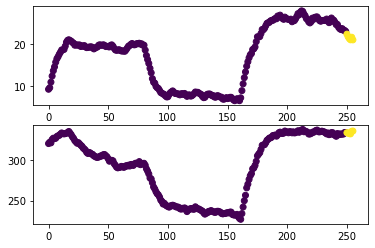

In [9]:
sseg = SAXSegmentation(partitions=10, win_length=32)
seg_m = sseg.segment(mts)
fig, ax = plt.subplots(2,1)
ax[0].scatter(range(n), mts[:, 0], c=seg_m[:,0])
ax[1].scatter(range(n), mts[:, 1], c=seg_m[:,1])
plt.show()